In [ ]:
!pip install ultralytics
!git clone https://github.com/advadj67/hw3_M11221004.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.9/756.9 kB 5.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
'''
#將.xml轉成Yolo所需 .txt檔案
import os
import xml.etree.ElementTree as ET

def convert_coordinates(size, box):
    # 轉換坐標
    dw = 1.0 / size[0]
    dh = 1.0 / size[1]
    x = (box[0] + box[1]) / 2.0
    y = (box[2] + box[3]) / 2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return (x, y, w, h)

def convert_xml_to_yolo(xml_path, output_root, class_dict, output_folders):
    # 解析XML並轉換為YOLO格式
    tree = ET.parse(xml_path)
    root = tree.getroot()

    size = root.find('size')
    w = int(size.find('width').text)
    h = int(size.find('height').text)

    for output_folder in output_folders:
        folder_name = os.path.basename(output_folder)
        output_dir = os.path.join(output_root, folder_name)
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        output_file_path = os.path.join(output_dir, os.path.splitext(os.path.basename(xml_path))[0] + '.txt')
        with open(output_file_path, 'w') as f:
            for obj in root.findall('object'):
                cls = obj.find('name').text
                if cls not in class_dict:
                    continue
                cls_id = class_dict[cls]
                xml_box = obj.find('bndbox')
                box = (float(xml_box.find('xmin').text), float(xml_box.find('xmax').text),
                       float(xml_box.find('ymin').text), float(xml_box.find('ymax').text))
                bb = convert_coordinates((w,h), box)
                f.write(f"{cls_id} {' '.join([str(a) for a in bb])}\n")

# 資料夾列表
folders = ["訓練集_xml", "驗證集_xml", "測試集_xml"]
o_folders = ["train", "val", "test"]

# 分類字典，將類別名映射到整數標籤
class_dict = {"container": 0}

# 輸出根資料夾路徑
output_root = "E:\Downloads\貨櫃資料集\labels"

# 如果輸出根資料夾不存在，則創建
if not os.path.exists(output_root):
    os.makedirs(output_root)

# 迴圈處理每個資料夾
for folder, o_folder in zip(folders, o_folders):
    folder_path = os.path.join("E:\Downloads\貨櫃資料集", folder)  # 資料夾路徑
    xml_files = [f for f in os.listdir(folder_path) if f.endswith('.xml')]  # 獲取所有XML檔案
    output_folders = [os.path.join(output_root, o_folder)]  # 輸出資料夾路徑
    for xml_file in xml_files:
        xml_path = os.path.join(folder_path, xml_file)  # XML檔案路徑
        convert_xml_to_yolo(xml_path, output_root, class_dict, output_folders)

print("labels轉換完成!")
'''

In [ ]:
'''
from PIL import Image

# 資料夾列表
folder_path = "E:/Downloads/貨櫃資料集/"
folders = [folder_path + "訓練集", folder_path + "驗證集", folder_path + "測試集"]

output_folders = [folder_path + "images/train", folder_path + "images/val", folder_path + "images/test"]


# 創建輸出資料夾
for output_folder in output_folders:
    os.makedirs(output_folder, exist_ok=True)

# 轉換函數
def resize_images(folder, output_folder):
    # 獲取資料夾中所有圖片的檔案名稱
    files = os.listdir(folder)

    # 迴圈處理每張圖片
    for file in files:
        # 檔案路徑
        file_path = os.path.join(folder, file)

        # 如果是檔案
        if os.path.isfile(file_path):
            # 打開圖片
            img = Image.open(file_path)

            # 重新調整大小
            resized_img = img.resize((416, 416))

            # 另存新圖片
            resized_img.save(os.path.join(output_folder, file))

# 對每個資料夾和對應的輸出資料夾調用resize_images函數
for folder, output_folder in zip(folders, output_folders):
    resize_images(folder, output_folder)

print("images轉換完成!")
'''

images轉換完成!


In [ ]:
'''
#修改bounding box座標

def resize_bounding_boxes(label_file_path, original_size, new_size):
    # 讀取原始標籤文件
    with open(label_file_path, 'r') as f:
        lines = f.readlines()

    # 計算大小比例
    width_ratio = new_size[0] / original_size[0]
    height_ratio = new_size[1] / original_size[1]

    # 對每個 bounding box 進行調整
    for i, line in enumerate(lines):
        parts = line.strip().split()
        # 解析原始 bounding box 坐標
        x_center = float(parts[1])
        y_center = float(parts[2])
        width = float(parts[3])
        height = float(parts[4])
        # 調整 bounding box 坐標
        x_center *= width_ratio
        y_center *= height_ratio
        width *= width_ratio
        height *= height_ratio
        # 更新標籤文件中的 bounding box 坐標
        lines[i] = f"{parts[0]} {x_center} {y_center} {width} {height}\n"

    # 將更新後的內容寫回標籤文件
    with open(label_file_path, 'w') as f:
        f.writelines(lines)

# 設置原始影像大小和新影像大小
original_size = (1920, 1080)
new_size = (416, 416)

# 設置資料集目錄路徑
dataset_dir = "/content/hw3_M11221004/貨櫃資料集/labels"
subfolders = ['train', 'val', 'test']

# 迴圈遍歷每個子資料夾中的標籤文件
for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_dir, subfolder)
    label_files = [f for f in os.listdir(subfolder_path) if f.endswith('.txt')]
    for label_file in label_files:
        label_file_path = os.path.join(subfolder_path, label_file)
        # 調整 bounding box 坐標
        resize_bounding_boxes(label_file_path, original_size, new_size)
'''

In [7]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data='/content/hw3_M11221004/貨櫃資料集/data.yaml', epochs=20, patience=5, imgsz=416)

# Save the best model
best_model_path = "/content/best_model.pt"
model.save(best_model_path)

model.val()  # It'll automatically evaluate the data you trained.

Transferred 319/355 items from pretrained weights
Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/hw3_M11221004/貨櫃資料集/data.yaml, epochs=20, time=None, patience=5, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=

train: Scanning /content/hw3_M11221004/貨櫃資料集/labels/train.cache... 2125 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2125/2125 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/hw3_M11221004/貨櫃資料集/labels/val.cache... 536 images, 0 backgrounds, 0 corrupt: 100%|██████████| 536/536 [00:00<?, ?it/s]


Plotting labels to runs/detect/train9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train9
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      1.08G      1.301      1.967      1.089         16        416: 100%|██████████| 133/133 [00:33<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  4.19it/s]


                   all        536        536      0.931      0.949      0.981      0.752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      1.02G     0.8357     0.7817     0.9088         22        416: 100%|██████████| 133/133 [00:32<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.53it/s]


                   all        536        536      0.994      0.993      0.995      0.785

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      1.02G     0.8214     0.6381     0.9067         20        416: 100%|██████████| 133/133 [00:33<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.51it/s]

                   all        536        536      0.999          1      0.995      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      1.01G     0.7827     0.5594     0.9028         18        416: 100%|██████████| 133/133 [00:29<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.03it/s]

                   all        536        536          1          1      0.995      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      1.02G      0.746     0.4912     0.8882         17        416: 100%|██████████| 133/133 [00:27<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  5.89it/s]

                   all        536        536          1          1      0.995      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      1.01G      0.725     0.4615     0.8826         15        416: 100%|██████████| 133/133 [00:31<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  5.88it/s]

                   all        536        536          1          1      0.995      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      1.02G      0.704     0.4357     0.8784         24        416: 100%|██████████| 133/133 [00:28<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.10it/s]

                   all        536        536          1          1      0.995      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      1.01G     0.6659     0.4133     0.8677         24        416: 100%|██████████| 133/133 [00:26<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.53it/s]

                   all        536        536          1          1      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      1.02G     0.6702     0.3963     0.8602         14        416: 100%|██████████| 133/133 [00:31<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  5.72it/s]

                   all        536        536          1          1      0.995      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      1.01G     0.6563     0.3879     0.8627         16        416: 100%|██████████| 133/133 [00:28<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.06it/s]

                   all        536        536          1          1      0.995      0.852


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      1.15G     0.6277     0.3628     0.8652         11        416: 100%|██████████| 133/133 [00:31<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  5.88it/s]

                   all        536        536      0.999          1      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      1.01G     0.6166     0.3558      0.857         13        416: 100%|██████████| 133/133 [00:29<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.70it/s]

                   all        536        536          1          1      0.995      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      1.02G     0.6066     0.3396     0.8546         11        416: 100%|██████████| 133/133 [00:26<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.47it/s]

                   all        536        536          1          1      0.995       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      1.01G     0.5886     0.3271     0.8482         13        416: 100%|██████████| 133/133 [00:31<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.33it/s]

                   all        536        536          1          1      0.995      0.854
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 9, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



14 epochs completed in 0.142 hours.
Optimizer stripped from runs/detect/train9/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train9/weights/best.pt, 6.2MB

Validating runs/detect/train9/weights/best.pt...
Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.51it/s]


                   all        536        536          1          1      0.995      0.862
Speed: 0.2ms preprocess, 1.7ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train9
Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/hw3_M11221004/貨櫃資料集/labels/val.cache... 536 images, 0 backgrounds, 0 corrupt: 100%|██████████| 536/536 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  4.95it/s]


                   all        536        536          1          1      0.995      0.863
Speed: 0.4ms preprocess, 2.7ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train92


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d1380b14430>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [8]:
# 載入最佳模型
best_model_path = "/content/best_model.pt"
best_model = YOLO('yolov8n.yaml').load(best_model_path)

# Define path to the image file
source = '/content/hw3_M11221004/貨櫃資料集/測試集/image_0001.jpg'

# Run inference on the source
results = model(source)  # list of Results objects

# 顯示物件類別
print(results[0].boxes.cls)
print()

# 顯示物件座標
print(results[0].boxes.xyxy)

Transferred 319/355 items from pretrained weights

image 1/1 /content/hw3_M11221004/貨櫃資料集/測試集/image_0001.jpg: 256x416 2 container numbers, 35.2ms
Speed: 2.0ms preprocess, 35.2ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 416)
tensor([0., 0.], device='cuda:0')

tensor([[ 753.4427,  105.4417, 1094.4940,  241.1807],
        [ 882.2606,  107.4345, 1095.2970,  240.9023]], device='cuda:0')


In [1]:
from PIL import Image
import cv2

# results = model.predict(source="0")
# 整個目錄
# results = model.predict(source="folder", show=True)

# from PIL
im1 = Image.open(source)
# save=True：存檔
results = model.predict(source=im1, show=True)

NameError: name 'source' is not defined

## 文字辨識OCR

In [10]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 34.0 MB/s eta 0:00:00


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete/content/hw3_M11221004/貨櫃資料集/images/test/image_0472.jpg

0: 640x640 2 cars, 1 bus, 1 train, 29.4ms
Speed: 3.4ms preprocess, 29.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
/content/hw3_M11221004/貨櫃資料集/images/test/image_0444.jpg

0: 640x640 3 cars, 1 parking meter, 15.0ms
Speed: 3.5ms preprocess, 15.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
/content/hw3_M11221004/貨櫃資料集/images/test/image_0536.jpg

0: 640x640 1 car, 1 train, 19.0ms
Speed: 3.2ms preprocess, 19.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
/content/hw3_M11221004/貨櫃資料集/images/test/image_0272.jpg

0: 640x640 3 cars, 16.6ms
Speed: 3.4ms preprocess, 16.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
/content/hw3_M11221004/貨櫃資料集/images/test/image_0192.jpg

0: 640x640 3 buss, 1 truck, 28.6ms
Speed: 2.8ms preprocess, 28.6ms inference, 2.1ms postprocess per imag

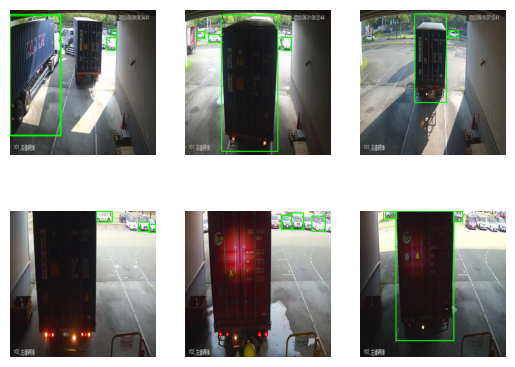

In [11]:
import os  # 導入操作系統相關的庫
import platform  # 導入獲取系統信息的庫
import pylab as plt  # 導入繪圖庫
import cv2  # 導入 OpenCV 库
import numpy as np  # 導入處理數組的庫
import easyocr  # 導入 EasyOCR 库
from PIL import Image, ImageFont, ImageDraw  # 導入圖像處理庫中的相關模組
from ultralytics import YOLO  # 導入 YOLO 相關庫
import random

def text(img, text, xy=(0, 0), color=(0, 0, 0), size=20, font=None):
    pil = Image.fromarray(img)  # 將圖像轉換為 PIL.Image 格式
    if font is None:  # 如果未指定字體，則隨機選擇一個預先安裝的字體
        font_list = ['Arial', 'Times New Roman', 'Courier New']  # 預先安裝的字體列表
        font = random.choice(font_list)  # 從列表中隨機選擇一個字體
    font = ImageFont.truetype(font + '.ttf', size)  # 使用指定的字體和大小
    ImageDraw.Draw(pil).text(xy, text, font=font, fill=color)  # 在圖像上繪製文字
    return np.asarray(pil)  # 將 PIL.Image 格式轉換為 numpy.ndarray 格式

# 初始化 YOLO 模型，載入預訓練權重
model = YOLO('/content/best_model.pt')

# 初始化 EasyOCR 讀取器，指定支持的語言
reader = easyocr.Reader(['en'])

# 指定要處理的圖像路徑
path = "/content/hw3_M11221004/貨櫃資料集/images/test"

# 設置圖像顯示的大小
#plt.figure(figsize=(12, 9))

# 遍歷指定路徑下的前六張圖像
for i, file in enumerate(os.listdir(path)[0:6]):
    full = os.path.join(path, file)  # 獲取完整的圖像路徑
    print(full)  # 輸出圖像的完整路徑

    # 讀取圖像
    img = cv2.imdecode(np.fromfile(full, dtype=np.uint8), cv2.IMREAD_COLOR)
    img = img[:, :, ::-1].copy()  # 將圖像從 BGR 格式轉換為 RGB 格式

    # 使用 YOLO 模型進行物件偵測
    results = model.predict(img, save=False)
    boxes = results[0].boxes.xyxy  # 獲取偵測到的物件框的坐標

    # 遍歷每個物件框
    for box in boxes:
        x1 = int(box[0])  # 物件框左上角 x 座標
        y1 = int(box[1])  # 物件框左上角 y 座標
        x2 = int(box[2])  # 物件框右下角 x 座標
        y2 = int(box[3])  # 物件框右下角 y 座標

        # 在圖像上繪製物件框
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # 從物件框中提取汽車區域，並使用 EasyOCR 库進行文字識別
        cropped_image = img[y1:y2, x1:x2]
        result = reader.readtext(cropped_image)

        # 如果識別結果不為空，則在圖像上繪製識別結果
        if result:
            text_to_write = result[0][1]  # 獲取識別結果中的第一個文字
            img = text(img, text_to_write, (x1, y1 - 20), (0, 255, 0), 25)

    # 將處理後的圖像顯示在指定的子圖中
    plt.subplot(2, 3, i + 1)
    plt.axis("off")  # 不顯示坐標軸
    plt.imshow(img)  # 顯示圖像

# 將處理後的圖像保存為文件
plt.savefig("yolov8_car.jpg")

# 顯示圖像
plt.show()

### **缺乏：**


1. mAP、Recall、Precision和F1-score
2. 準確率績效公式: 辨識正確筆數/測試資料筆數
3. 車牌偵測及文字辨識
4. 影片的






